<a href="https://colab.research.google.com/github/Jamian20/SWEP_ML_Projects/blob/main/Phone_Usage_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('Phone Usage Classification.csv')
df

InvalidURL: URL can't contain control characters. '/Jamian20/SWEP_ML_Projects/main/Phone Usage Classification.csv' (found at least ' ')

In [ ]:
train =  df.iloc[1:16]
test = df.iloc[[0, -1]]

,S/N,Screen On Time (minutes),Battery Drop (%),Class Label
0,1,10,6,Low
16,17,79,43,High


In [ ]:
test_point = test[['Screen On Time (minutes)', 'Battery Drop (%)']].iloc[0].to_numpy().astype(float)
train_points = train[['Screen On Time (minutes)', 'Battery Drop (%)']].to_numpy().astype(float)

# compute distances safely
diff = train_points - test_point
distances = np.sqrt(np.sum(diff**2, axis=1))

# add and sort
train['Distance'] = distances
train_sorted = train.sort_values(by='Distance')
train_sorted

/tmp/ipython-input-1713855582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Distance'] = distances


,S/N,Screen On Time (minutes),Battery Drop (%),Class Label,Distance
1,2,14,8,Low,4.472136
14,15,5,2,Low,6.403124
5,6,23,10,Low,13.601471
10,11,28,9,Low,18.248288
6,7,36,17,Medium,28.231188
2,3,44,16,Medium,35.440090
7,8,57,20,Medium,49.040799
3,4,63,16,Medium,53.935146
12,13,66,36,High,63.529521
8,9,71,24,Medium,63.600314


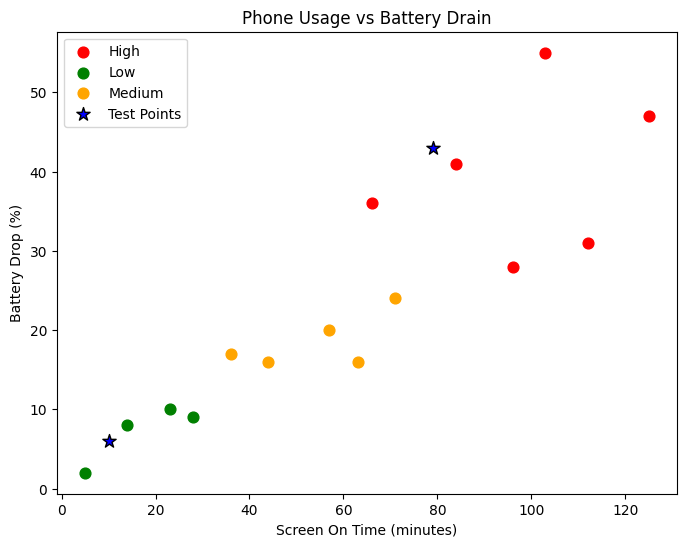

In [ ]:
colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test points
plt.scatter(test['Screen On Time (minutes)'], test['Battery Drop (%)'],
            color='blue', s=100, edgecolor='black', marker='*', label='Test Points')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('Phone Usage vs Battery Drain')
plt.legend()
plt.show()


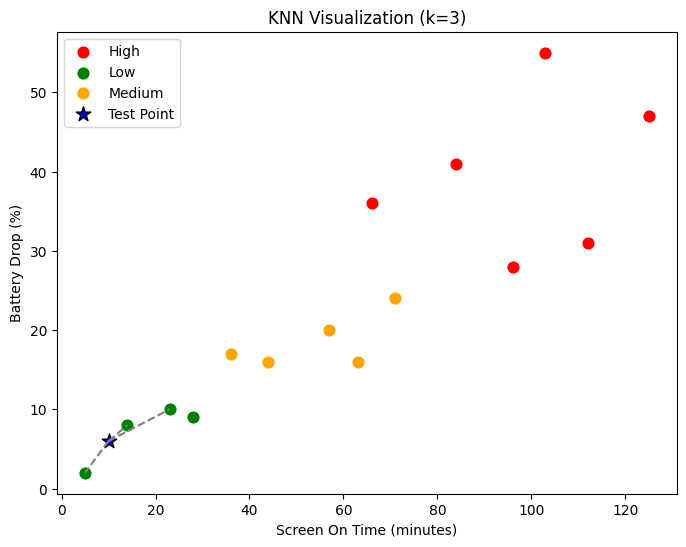

In [ ]:
k = 3
nearest = train_sorted.head(k)

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test point
plt.scatter(test_point[0], test_point[1], color='blue', s=120, edgecolor='black', marker='*', label='Test Point')

# Draw lines to nearest neighbors
for _, row in nearest.iterrows():
    plt.plot([test_point[0], row['Screen On Time (minutes)']], [test_point[1], row['Battery Drop (%)']],
             color='gray', linestyle='--')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('KNN Visualization (k=3)')
plt.legend()
plt.show()


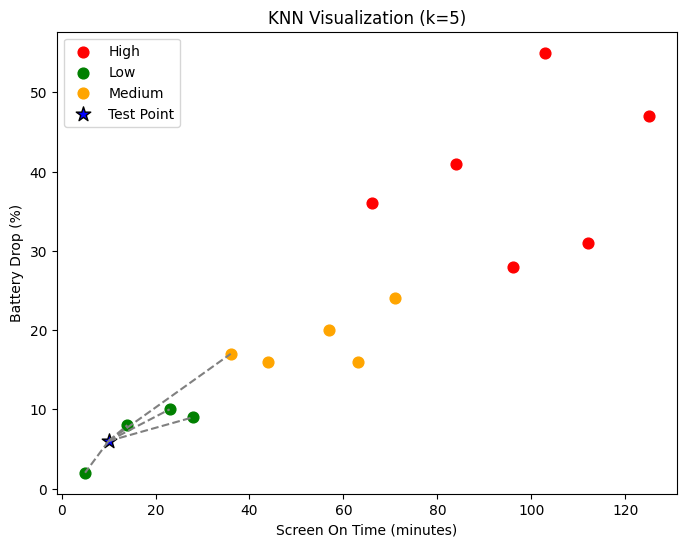

In [ ]:
k = 5
nearest = train_sorted.head(k)

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test point
plt.scatter(test_point[0], test_point[1], color='blue', s=120, edgecolor='black', marker='*', label='Test Point')

# Draw lines to nearest neighbors
for _, row in nearest.iterrows():
    plt.plot([test_point[0], row['Screen On Time (minutes)']], [test_point[1], row['Battery Drop (%)']],
             color='gray', linestyle='--')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('KNN Visualization (k=5)')
plt.legend()
plt.show()


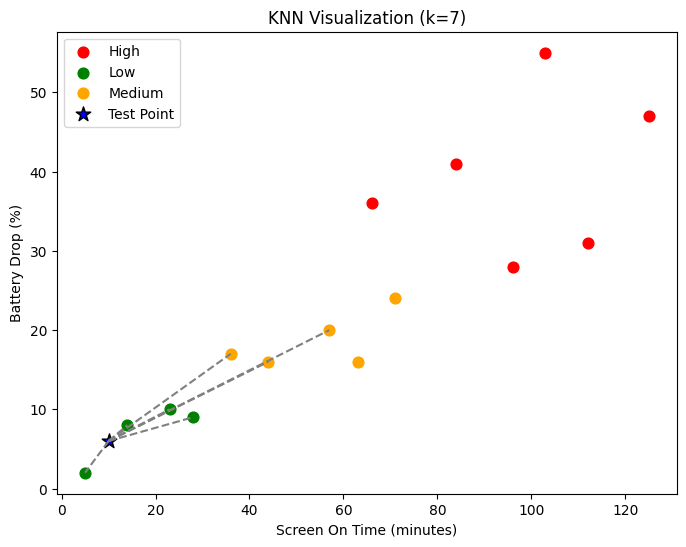

In [ ]:
k = 7
nearest = train_sorted.head(k)

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test point
plt.scatter(test_point[0], test_point[1], color='blue', s=120, edgecolor='black', marker='*', label='Test Point')

# Draw lines to nearest neighbors
for _, row in nearest.iterrows():
    plt.plot([test_point[0], row['Screen On Time (minutes)']], [test_point[1], row['Battery Drop (%)']],
             color='gray', linestyle='--')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('KNN Visualization (k=7)')
plt.legend()
plt.show()


In [ ]:
test_point = test[['Screen On Time (minutes)', 'Battery Drop (%)']].iloc[1].to_numpy().astype(float)
train_points = train[['Screen On Time (minutes)', 'Battery Drop (%)']].to_numpy().astype(float)

# compute distances safely
diff = train_points - test_point
distances = np.sqrt(np.sum(diff**2, axis=1))

# add and sort
train['Distance'] = distances
train_sorted = train.sort_values(by='Distance')
train_sorted

/tmp/ipython-input-2684034343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Distance'] = distances


,S/N,Screen On Time (minutes),Battery Drop (%),Class Label,Distance
4,5,84,41,High,5.385165
12,13,66,36,High,14.764823
8,9,71,24,Medium,20.615528
9,10,96,28,High,22.671568
11,12,103,55,High,26.832816
3,4,63,16,Medium,31.384710
7,8,57,20,Medium,31.827661
15,16,112,31,High,35.114100
2,3,44,16,Medium,44.204072
13,14,125,47,High,46.173586


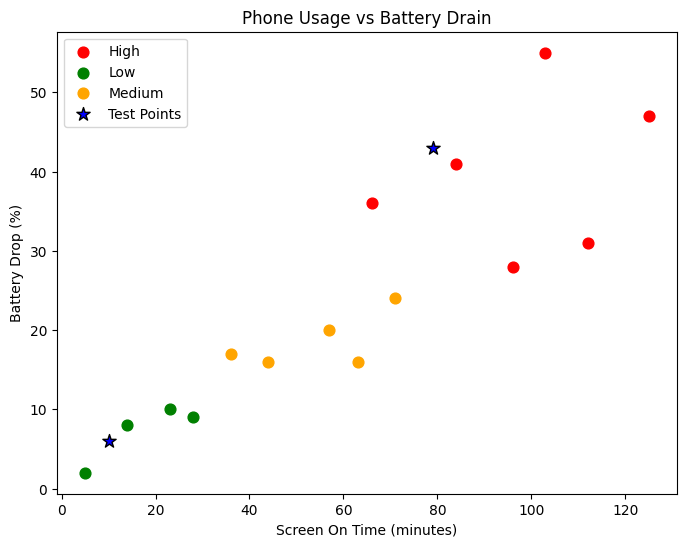

In [ ]:
colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test points
plt.scatter(test['Screen On Time (minutes)'], test['Battery Drop (%)'],
            color='blue', s=100, edgecolor='black', marker='*', label='Test Points')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('Phone Usage vs Battery Drain')
plt.legend()
plt.show()

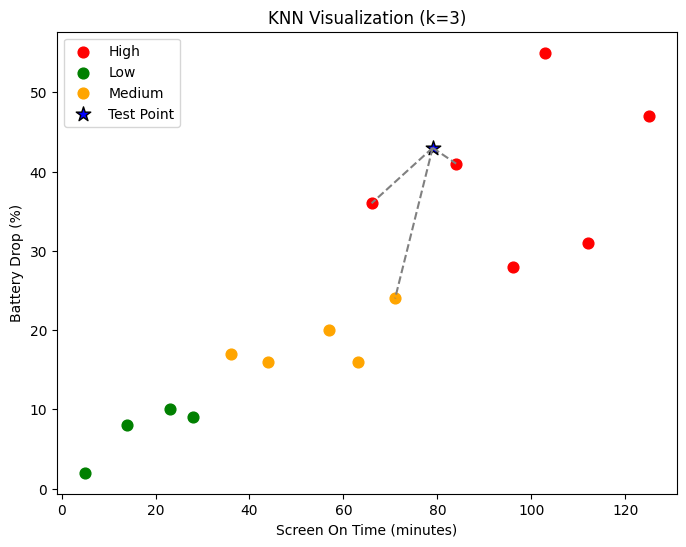

In [ ]:
k = 3
nearest = train_sorted.head(k)

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test point
plt.scatter(test_point[0], test_point[1], color='blue', s=120, edgecolor='black', marker='*', label='Test Point')

# Draw lines to nearest neighbors
for _, row in nearest.iterrows():
    plt.plot([test_point[0], row['Screen On Time (minutes)']], [test_point[1], row['Battery Drop (%)']],
             color='gray', linestyle='--')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('KNN Visualization (k=3)')
plt.legend()
plt.show()

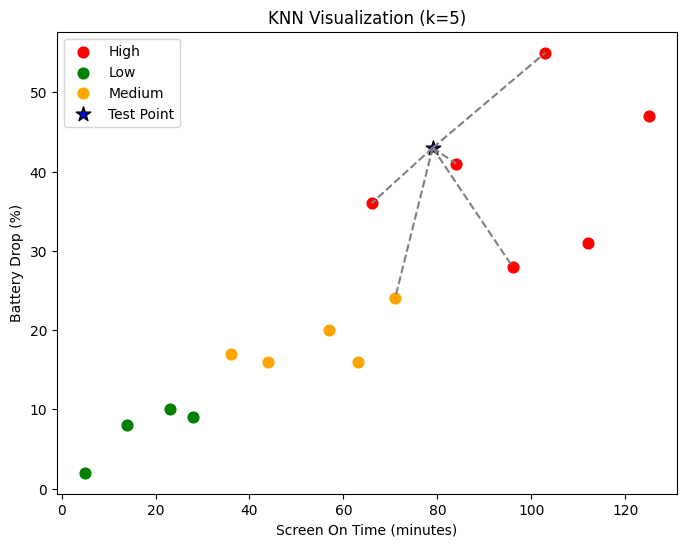

In [ ]:
k = 5
nearest = train_sorted.head(k)

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test point
plt.scatter(test_point[0], test_point[1], color='blue', s=120, edgecolor='black', marker='*', label='Test Point')

# Draw lines to nearest neighbors
for _, row in nearest.iterrows():
    plt.plot([test_point[0], row['Screen On Time (minutes)']], [test_point[1], row['Battery Drop (%)']],
             color='gray', linestyle='--')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('KNN Visualization (k=5)')
plt.legend()
plt.show()

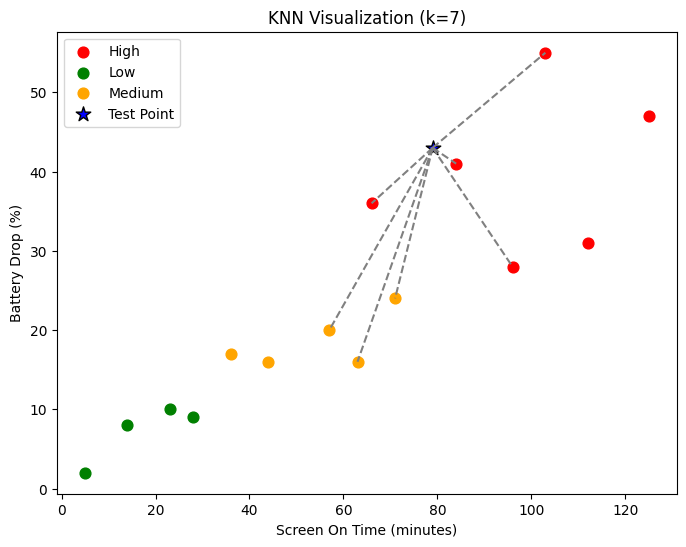

In [ ]:
k = 7
nearest = train_sorted.head(k)

plt.figure(figsize=(8,6))
for label, group in train.groupby('Class Label'):
    plt.scatter(group['Screen On Time (minutes)'], group['Battery Drop (%)'],
                color=colors[label], label=label, s=60)

# Highlight test point
plt.scatter(test_point[0], test_point[1], color='blue', s=120, edgecolor='black', marker='*', label='Test Point')

# Draw lines to nearest neighbors
for _, row in nearest.iterrows():
    plt.plot([test_point[0], row['Screen On Time (minutes)']], [test_point[1], row['Battery Drop (%)']],
             color='gray', linestyle='--')

plt.xlabel('Screen On Time (minutes)')
plt.ylabel('Battery Drop (%)')
plt.title('KNN Visualization (k=7)')
plt.legend()
plt.show()